# 데이터 불러오기

In [1]:
import pandas as pd

In [2]:
df_list = [
    pd.read_csv("./data/주민등록인구및세대현황_연간_대전/2008-2017.csv", encoding="cp949"),
    pd.read_csv("./data/주민등록인구및세대현황_연간_대전/2018-2024.csv", encoding="cp949"),
]

한 번에 데이터 분석을 하기 위해서 각 DataFrame들을 `merge`시켜야하구요.

아래처럼 2개씩 끊어서 merge를 해야만 합니다.

In [3]:
df = pd.merge(
    df_list[0],
    df_list[1],
    on="행정구역",
    how="outer")

print(df.shape)
df.head()

(6, 103)


,행정구역,2008년_총인구수,2008년_세대수,2008년_세대당 인구,2008년_남자 인구수,2008년_여자 인구수,2008년_남여 비율,2009년_총인구수,2009년_세대수,2009년_세대당 인구,...,2023년_세대당 인구,2023년_남자 인구수,2023년_여자 인구수,2023년_남여 비율,2024년_총인구수,2024년_세대수,2024년_세대당 인구,2024년_남자 인구수,2024년_여자 인구수,2024년_남여 비율
0,대전광역시 (3000000000),"1,480,895","531,682",2.79,"741,611","739,284",1.00,"1,484,180","538,100",2.76,...,2.12,"719,292","722,924",0.99,"1,439,157","687,757",2.09,"717,291","721,866",0.99
1,대전광역시 대전광역시 대덕구 (3023000000),"211,241","74,143",2.85,"107,127","104,114",1.03,"208,147","74,113",2.81,...,2.12,"86,301","83,552",1.03,"168,217","81,051",2.08,"85,407","82,810",1.03
2,대전광역시 대전광역시 동구 (3011000000),"245,973","94,402",2.61,"124,816","121,157",1.03,"246,116","95,415",2.58,...,2.00,"109,555","108,073",1.01,"218,513","110,878",1.97,"109,950","108,563",1.01
3,대전광역시 대전광역시 서구 (3017000000),"499,172","174,265",2.86,"246,386","252,786",0.97,"499,297","176,293",2.83,...,2.14,"228,024","236,610",0.96,"457,951","217,245",2.11,"224,447","233,504",0.96
4,대전광역시 대전광역시 유성구 (3020000000),"259,831","91,153",2.85,"131,143","128,688",1.02,"266,585","93,906",2.84,...,2.20,"185,786","181,059",1.03,"369,468","170,225",2.17,"187,149","182,319",1.03


총 count Row는 제외합시다.

In [4]:
df = df.iloc[1:]
print(df.shape)
df.head()

(5, 103)


,행정구역,2008년_총인구수,2008년_세대수,2008년_세대당 인구,2008년_남자 인구수,2008년_여자 인구수,2008년_남여 비율,2009년_총인구수,2009년_세대수,2009년_세대당 인구,...,2023년_세대당 인구,2023년_남자 인구수,2023년_여자 인구수,2023년_남여 비율,2024년_총인구수,2024년_세대수,2024년_세대당 인구,2024년_남자 인구수,2024년_여자 인구수,2024년_남여 비율
1,대전광역시 대전광역시 대덕구 (3023000000),"211,241","74,143",2.85,"107,127","104,114",1.03,"208,147","74,113",2.81,...,2.12,"86,301","83,552",1.03,"168,217","81,051",2.08,"85,407","82,810",1.03
2,대전광역시 대전광역시 동구 (3011000000),"245,973","94,402",2.61,"124,816","121,157",1.03,"246,116","95,415",2.58,...,2.00,"109,555","108,073",1.01,"218,513","110,878",1.97,"109,950","108,563",1.01
3,대전광역시 대전광역시 서구 (3017000000),"499,172","174,265",2.86,"246,386","252,786",0.97,"499,297","176,293",2.83,...,2.14,"228,024","236,610",0.96,"457,951","217,245",2.11,"224,447","233,504",0.96
4,대전광역시 대전광역시 유성구 (3020000000),"259,831","91,153",2.85,"131,143","128,688",1.02,"266,585","93,906",2.84,...,2.20,"185,786","181,059",1.03,"369,468","170,225",2.17,"187,149","182,319",1.03
5,대전광역시 대전광역시 중구 (3014000000),"264,678","97,719",2.71,"132,139","132,539",1.00,"264,035","98,373",2.68,...,2.09,"109,626","113,630",0.96,"225,008","108,358",2.08,"110,338","114,670",0.96


그리고, 행정구역 컬럼은 인덱스로 지정하여, row data는 모두 숫자 데이터만 남겨둡시다.

In [5]:
df = df.set_index("행정구역")
print(df.shape)
df.head()

(5, 102)


,2008년_총인구수,2008년_세대수,2008년_세대당 인구,2008년_남자 인구수,2008년_여자 인구수,2008년_남여 비율,2009년_총인구수,2009년_세대수,2009년_세대당 인구,2009년_남자 인구수,...,2023년_세대당 인구,2023년_남자 인구수,2023년_여자 인구수,2023년_남여 비율,2024년_총인구수,2024년_세대수,2024년_세대당 인구,2024년_남자 인구수,2024년_여자 인구수,2024년_남여 비율
행정구역,,,,,,,,,,,,,,,,,,,,,
대전광역시 대전광역시 대덕구 (3023000000),"211,241","74,143",2.85,"107,127","104,114",1.03,"208,147","74,113",2.81,"105,643",...,2.12,"86,301","83,552",1.03,"168,217","81,051",2.08,"85,407","82,810",1.03
대전광역시 대전광역시 동구 (3011000000),"245,973","94,402",2.61,"124,816","121,157",1.03,"246,116","95,415",2.58,"124,936",...,2.00,"109,555","108,073",1.01,"218,513","110,878",1.97,"109,950","108,563",1.01
대전광역시 대전광역시 서구 (3017000000),"499,172","174,265",2.86,"246,386","252,786",0.97,"499,297","176,293",2.83,"246,234",...,2.14,"228,024","236,610",0.96,"457,951","217,245",2.11,"224,447","233,504",0.96
대전광역시 대전광역시 유성구 (3020000000),"259,831","91,153",2.85,"131,143","128,688",1.02,"266,585","93,906",2.84,"134,497",...,2.20,"185,786","181,059",1.03,"369,468","170,225",2.17,"187,149","182,319",1.03
대전광역시 대전광역시 중구 (3014000000),"264,678","97,719",2.71,"132,139","132,539",1.00,"264,035","98,373",2.68,"131,811",...,2.09,"109,626","113,630",0.96,"225,008","108,358",2.08,"110,338","114,670",0.96


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 대전광역시 대전광역시 대덕구 (3023000000) to 대전광역시 대전광역시 중구 (3014000000)
Columns: 102 entries, 2008년_총인구수 to 2024년_남여 비율
dtypes: float64(34), object(68)
memory usage: 4.0+ KB


일부 컬럼들의 숫자들이 int가 아니라 str이기 때문에, 이를 숫자로 변환해봅시다.

그런데 모든 컬럼이 문자열(object)가 아니라, 실수(float) 타입도 포함되어있기에 아래의 코드는 AttributeError가 발생합니다.

In [7]:
# # AttributeError: Can only use .str accessor with string values!
# df.apply(
#     lambda col: col.str.replace(",", "")
# )

어떤 타입의 값이든 문자열로 변환한 후에 replace를 적용하면 (조금 비효율적이지만), 간결한 코드로 이렇게 변환할 수 있습니다.

In [8]:
df = df.apply(
    lambda col: col.astype(str).str.replace(",", "")
).apply(
    pd.to_numeric
)
print(df.shape)
df.head()

(5, 102)


,2008년_총인구수,2008년_세대수,2008년_세대당 인구,2008년_남자 인구수,2008년_여자 인구수,2008년_남여 비율,2009년_총인구수,2009년_세대수,2009년_세대당 인구,2009년_남자 인구수,...,2023년_세대당 인구,2023년_남자 인구수,2023년_여자 인구수,2023년_남여 비율,2024년_총인구수,2024년_세대수,2024년_세대당 인구,2024년_남자 인구수,2024년_여자 인구수,2024년_남여 비율
행정구역,,,,,,,,,,,,,,,,,,,,,
대전광역시 대전광역시 대덕구 (3023000000),211241,74143,2.85,107127,104114,1.03,208147,74113,2.81,105643,...,2.12,86301,83552,1.03,168217,81051,2.08,85407,82810,1.03
대전광역시 대전광역시 동구 (3011000000),245973,94402,2.61,124816,121157,1.03,246116,95415,2.58,124936,...,2.00,109555,108073,1.01,218513,110878,1.97,109950,108563,1.01
대전광역시 대전광역시 서구 (3017000000),499172,174265,2.86,246386,252786,0.97,499297,176293,2.83,246234,...,2.14,228024,236610,0.96,457951,217245,2.11,224447,233504,0.96
대전광역시 대전광역시 유성구 (3020000000),259831,91153,2.85,131143,128688,1.02,266585,93906,2.84,134497,...,2.20,185786,181059,1.03,369468,170225,2.17,187149,182319,1.03
대전광역시 대전광역시 중구 (3014000000),264678,97719,2.71,132139,132539,1.00,264035,98373,2.68,131811,...,2.09,109626,113630,0.96,225008,108358,2.08,110338,114670,0.96


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 대전광역시 대전광역시 대덕구 (3023000000) to 대전광역시 대전광역시 중구 (3014000000)
Columns: 102 entries, 2008년_총인구수 to 2024년_남여 비율
dtypes: float64(34), int64(68)
memory usage: 4.0+ KB


# 헤더를 간결하게 변경해봅시다.

In [10]:
df.index

Index(['대전광역시 대전광역시 대덕구 (3023000000)', '대전광역시 대전광역시 동구 (3011000000)',
       '대전광역시 대전광역시 서구 (3017000000)', '대전광역시 대전광역시 유성구 (3020000000)',
       '대전광역시 대전광역시 중구 (3014000000)'],
      dtype='object', name='행정구역')

In [11]:
df.index = ["대덕구", "동구", "서구", "유성구", "중구"]

In [12]:
df.head()

,2008년_총인구수,2008년_세대수,2008년_세대당 인구,2008년_남자 인구수,2008년_여자 인구수,2008년_남여 비율,2009년_총인구수,2009년_세대수,2009년_세대당 인구,2009년_남자 인구수,...,2023년_세대당 인구,2023년_남자 인구수,2023년_여자 인구수,2023년_남여 비율,2024년_총인구수,2024년_세대수,2024년_세대당 인구,2024년_남자 인구수,2024년_여자 인구수,2024년_남여 비율
대덕구,211241,74143,2.85,107127,104114,1.03,208147,74113,2.81,105643,...,2.12,86301,83552,1.03,168217,81051,2.08,85407,82810,1.03
동구,245973,94402,2.61,124816,121157,1.03,246116,95415,2.58,124936,...,2.00,109555,108073,1.01,218513,110878,1.97,109950,108563,1.01
서구,499172,174265,2.86,246386,252786,0.97,499297,176293,2.83,246234,...,2.14,228024,236610,0.96,457951,217245,2.11,224447,233504,0.96
유성구,259831,91153,2.85,131143,128688,1.02,266585,93906,2.84,134497,...,2.20,185786,181059,1.03,369468,170225,2.17,187149,182319,1.03
중구,264678,97719,2.71,132139,132539,1.00,264035,98373,2.68,131811,...,2.09,109626,113630,0.96,225008,108358,2.08,110338,114670,0.96


# 함수화하여, 재사용성을 높여봅시다.

원본 `df`는 너무 쉽게 변경되는 데, 원본 `df`가 필요할 때, 다시 여러 Cells들을 구동해야하는 번거로움.

In [13]:
import re
from functools import reduce
from glob import glob
import pandas as pd

def get_주민등록인구및세대현황_연간_대전():
    dir_path = "./data/주민등록인구및세대현황_연간_대전/"
    filepath_list = glob(dir_path + "*.csv")

    df_list = [
        pd.read_csv(filepath, encoding="cp949")
        for filepath in filepath_list
    ]

    df = reduce(
        lambda df1, df2: pd.merge(df1, df2, on="행정구역", how="outer"),
        df_list,
    )    
    df = df.set_index("행정구역")
    df = df.apply(
        lambda col: col.astype(str).str.replace(",", "")
    ).apply(
        pd.to_numeric
    )

    # 인덱스에 "구 (" 문자열이 포함된 Row만 필터링 (합계 Row는 제외하기 위함임)
    mask = df.index.str.contains(r"구 \(")
    print("mask :", mask)
    df = df[mask]

    # 대전광역시 대전광역시 대덕구 (3023000000) → 대덕구
    df.index = [
        re.sub(r".*?\s([가-힣]+구)\s*\(.*", r"\1", name)
        for name in df.index]

    return df

In [14]:
대전_df = get_주민등록인구및세대현황_연간_대전()
print(대전_df.shape)
대전_df.head()

mask : [False  True  True  True  True  True]
(5, 102)


,2018년_총인구수,2018년_세대수,2018년_세대당 인구,2018년_남자 인구수,2018년_여자 인구수,2018년_남여 비율,2019년_총인구수,2019년_세대수,2019년_세대당 인구,2019년_남자 인구수,...,2016년_세대당 인구,2016년_남자 인구수,2016년_여자 인구수,2016년_남여 비율,2017년_총인구수,2017년_세대수,2017년_세대당 인구,2017년_남자 인구수,2017년_여자 인구수,2017년_남여 비율
대덕구,181991,75841,2.40,92457,89534,1.03,177031,75841,2.33,90030,...,2.51,97879,94809,1.03,186902,75923,2.46,94912,91990,1.03
동구,229071,102632,2.23,115735,113336,1.02,226771,104064,2.18,114447,...,2.34,118911,116048,1.02,230516,100677,2.29,116523,113993,1.02
서구,484663,199689,2.43,238678,245985,0.97,481222,203754,2.36,236851,...,2.55,242044,248967,0.97,487448,196016,2.49,240298,247150,0.97
유성구,349790,141533,2.47,176412,173378,1.02,349373,145305,2.40,176415,...,2.59,173072,170150,1.02,348428,137514,2.53,175744,172684,1.02
중구,244421,105270,2.32,121056,123365,0.98,240473,106379,2.26,118864,...,2.44,125383,127107,0.99,248933,104509,2.38,123492,125441,0.98


# 연도별 총인구수 정보만 가져와봅시다.

In [15]:
대전_df.columns

Index(['2018년_총인구수', '2018년_세대수', '2018년_세대당 인구', '2018년_남자 인구수',
       '2018년_여자 인구수', '2018년_남여 비율', '2019년_총인구수', '2019년_세대수',
       '2019년_세대당 인구', '2019년_남자 인구수',
       ...
       '2016년_세대당 인구', '2016년_남자 인구수', '2016년_여자 인구수', '2016년_남여 비율',
       '2017년_총인구수', '2017년_세대수', '2017년_세대당 인구', '2017년_남자 인구수',
       '2017년_여자 인구수', '2017년_남여 비율'],
      dtype='object', length=102)

In [16]:
column_names = [
    "2008년_총인구수",
    "2009년_총인구수",
    # ...
    "2024년_총인구수",
]

In [17]:
column_names = [f"{year}년_총인구수" for year in range(2008, 2025)]
column_names

['2008년_총인구수',
 '2009년_총인구수',
 '2010년_총인구수',
 '2011년_총인구수',
 '2012년_총인구수',
 '2013년_총인구수',
 '2014년_총인구수',
 '2015년_총인구수',
 '2016년_총인구수',
 '2017년_총인구수',
 '2018년_총인구수',
 '2019년_총인구수',
 '2020년_총인구수',
 '2021년_총인구수',
 '2022년_총인구수',
 '2023년_총인구수',
 '2024년_총인구수']

In [18]:
대전_총인구수_df = 대전_df.loc[:, column_names]
print(대전_총인구수_df.shape)
대전_총인구수_df

(5, 17)


,2008년_총인구수,2009년_총인구수,2010년_총인구수,2011년_총인구수,2012년_총인구수,2013년_총인구수,2014년_총인구수,2015년_총인구수,2016년_총인구수,2017년_총인구수,2018년_총인구수,2019년_총인구수,2020년_총인구수,2021년_총인구수,2022년_총인구수,2023년_총인구수,2024년_총인구수
대덕구,211241,208147,207549,205339,205688,204360,201558,196839,192688,186902,181991,177031,176384,175046,172746,169853,168217
동구,245973,246116,248835,251285,251945,250653,245493,239579,234959,230516,229071,226771,223021,222222,219751,217628,218513
서구,499172,499297,499742,499124,496513,498917,496132,490859,491011,487448,484663,481222,477880,473365,470374,464634,457951
유성구,259831,266585,281692,294353,306312,313968,327461,335312,343222,348428,349790,349373,351047,351277,356093,366845,369468
중구,264678,264035,265846,265502,264125,264913,261165,256186,252490,248933,244421,240473,235550,230341,227108,223256,225008


In [19]:
대전_총인구수_df_T = 대전_총인구수_df.T
대전_총인구수_df_T

,대덕구,동구,서구,유성구,중구
2008년_총인구수,211241,245973,499172,259831,264678
2009년_총인구수,208147,246116,499297,266585,264035
2010년_총인구수,207549,248835,499742,281692,265846
2011년_총인구수,205339,251285,499124,294353,265502
2012년_총인구수,205688,251945,496513,306312,264125
2013년_총인구수,204360,250653,498917,313968,264913
2014년_총인구수,201558,245493,496132,327461,261165
2015년_총인구수,196839,239579,490859,335312,256186
2016년_총인구수,192688,234959,491011,343222,252490
2017년_총인구수,186902,230516,487448,348428,248933


# 저장하기

In [20]:
대전_총인구수_df_T.to_csv("./data/행정구역별_연도별총인구수_대전.csv", index_label="연도")

# 시각화

In [21]:
import plotly.express as px

In [22]:
px.bar(
    대전_총인구수_df,
    # x="행정구역",  # index가 아닌 다른 값을 활용코자 할 때 사용
    # y=daejeon_df.columns,
    barmode="group",  # group, overlay, relative
)

유성구만 인구가 늘고 있고, 이를 제외한 행정구역에서는 인구가 줄고 있음을 확인할 수 있습니다.

x/y에 index/columns 값을 바꿔 지정하며, 차트 방향을 바꿔 생성할 수도 있습니다.

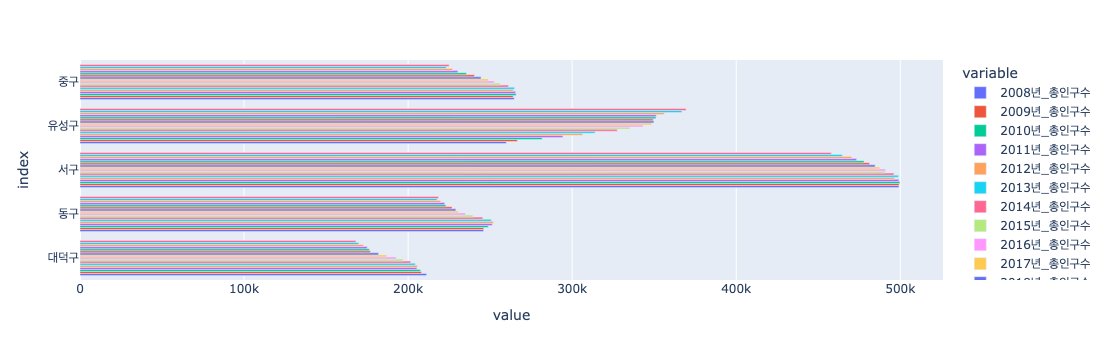

In [23]:
px.bar(
    대전_총인구수_df,
    x=대전_총인구수_df.columns,
    y=대전_총인구수_df.index,
    barmode="group",  # group, overlay, relative
)

# 연도별 총인구 데이터 분석 및 시각화

In [24]:
대전_총인구수_df_T.head()

,대덕구,동구,서구,유성구,중구
2008년_총인구수,211241,245973,499172,259831,264678
2009년_총인구수,208147,246116,499297,266585,264035
2010년_총인구수,207549,248835,499742,281692,265846
2011년_총인구수,205339,251285,499124,294353,265502
2012년_총인구수,205688,251945,496513,306312,264125


각 인덱스 문자열의 값이 반복이 많으니, 이를 제거해서 보다 간결하게 봐도 좋겠습니다.

In [25]:
[name[:5] for name in 대전_총인구수_df_T.index]

['2008년',
 '2009년',
 '2010년',
 '2011년',
 '2012년',
 '2013년',
 '2014년',
 '2015년',
 '2016년',
 '2017년',
 '2018년',
 '2019년',
 '2020년',
 '2021년',
 '2022년',
 '2023년',
 '2024년']

In [26]:
대전_총인구수_df_T.index = [name[:5] for name in 대전_총인구수_df_T.index]
대전_총인구수_df_T

,대덕구,동구,서구,유성구,중구
2008년,211241,245973,499172,259831,264678
2009년,208147,246116,499297,266585,264035
2010년,207549,248835,499742,281692,265846
2011년,205339,251285,499124,294353,265502
2012년,205688,251945,496513,306312,264125
2013년,204360,250653,498917,313968,264913
2014년,201558,245493,496132,327461,261165
2015년,196839,239579,490859,335312,256186
2016년,192688,234959,491011,343222,252490
2017년,186902,230516,487448,348428,248933


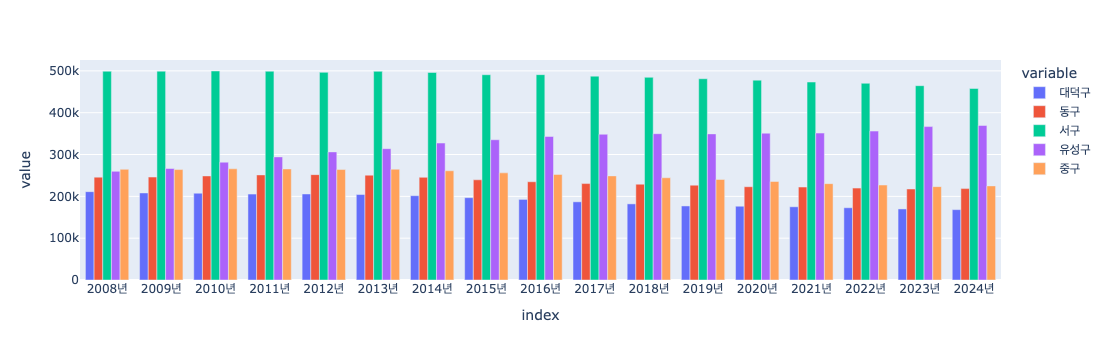

In [27]:
px.bar(
    대전_총인구수_df_T,
    barmode="group",
)

Line 차트로 보다 직관적으로 Flow를 파악해봅시다.

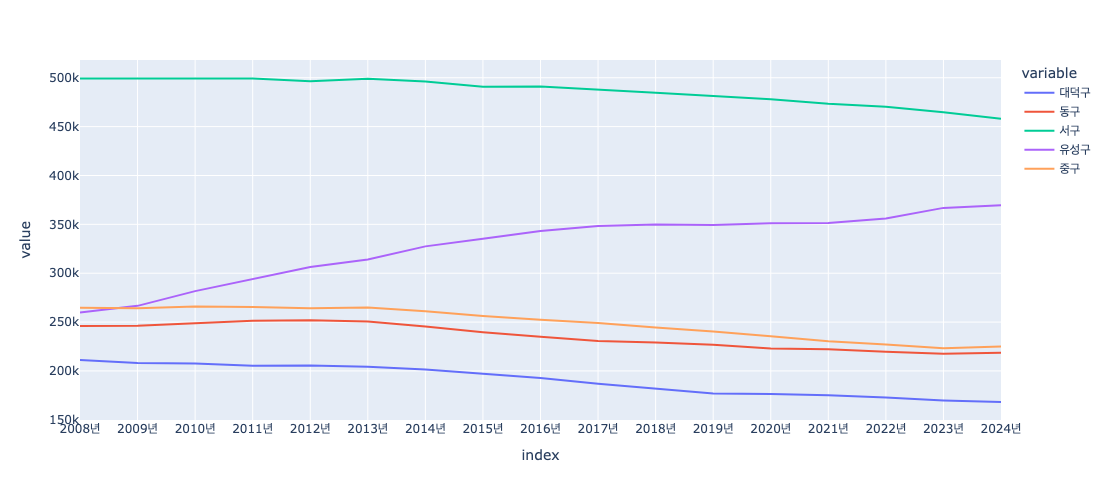

In [28]:
fig = px.line(
    대전_총인구수_df_T,
)
fig.update_layout(
    autosize=False,
    width=500,
    height=500,
)

# 성별에 따른 대전 인구 데이터 분석 및 시각화

In [29]:
df = get_주민등록인구및세대현황_연간_대전()
print(df.shape)
df.head()

mask : [False  True  True  True  True  True]
(5, 102)


,2018년_총인구수,2018년_세대수,2018년_세대당 인구,2018년_남자 인구수,2018년_여자 인구수,2018년_남여 비율,2019년_총인구수,2019년_세대수,2019년_세대당 인구,2019년_남자 인구수,...,2016년_세대당 인구,2016년_남자 인구수,2016년_여자 인구수,2016년_남여 비율,2017년_총인구수,2017년_세대수,2017년_세대당 인구,2017년_남자 인구수,2017년_여자 인구수,2017년_남여 비율
대덕구,181991,75841,2.40,92457,89534,1.03,177031,75841,2.33,90030,...,2.51,97879,94809,1.03,186902,75923,2.46,94912,91990,1.03
동구,229071,102632,2.23,115735,113336,1.02,226771,104064,2.18,114447,...,2.34,118911,116048,1.02,230516,100677,2.29,116523,113993,1.02
서구,484663,199689,2.43,238678,245985,0.97,481222,203754,2.36,236851,...,2.55,242044,248967,0.97,487448,196016,2.49,240298,247150,0.97
유성구,349790,141533,2.47,176412,173378,1.02,349373,145305,2.40,176415,...,2.59,173072,170150,1.02,348428,137514,2.53,175744,172684,1.02
중구,244421,105270,2.32,121056,123365,0.98,240473,106379,2.26,118864,...,2.44,125383,127107,0.99,248933,104509,2.38,123492,125441,0.98


In [33]:
column_names = [
    "2018년_남자 인구수", "2018년_여자 인구수",
    # TODO: 년도 지정 ...
    "2024년_남자 인구수", "2024년_여자 인구수",
]
df[column_names]

,2018년_남자 인구수,2018년_여자 인구수,2024년_남자 인구수,2024년_여자 인구수
대덕구,92457,89534,85407,82810
동구,115735,113336,109950,108563
서구,238678,245985,224447,233504
유성구,176412,173378,187149,182319
중구,121056,123365,110338,114670


In [41]:
column_names = sorted(
    [f"{year}년_남자 인구수" for year in range(2018, 2025)] + [f"{year}년_여자 인구수" for year in range(2018, 2025)]
)
성별_인구수_df = df[column_names]
print(성별_인구수_df.shape)
성별_인구수_df.head()

(5, 14)


,2018년_남자 인구수,2018년_여자 인구수,2019년_남자 인구수,2019년_여자 인구수,2020년_남자 인구수,2020년_여자 인구수,2021년_남자 인구수,2021년_여자 인구수,2022년_남자 인구수,2022년_여자 인구수,2023년_남자 인구수,2023년_여자 인구수,2024년_남자 인구수,2024년_여자 인구수
대덕구,92457,89534,90030,87001,89698,86686,88989,86057,87788,84958,86301,83552,85407,82810
동구,115735,113336,114447,112324,112416,110605,111953,110269,110590,109161,109555,108073,109950,108563
서구,238678,245985,236851,244371,235112,242768,232714,240651,230998,239376,228024,236610,224447,233504
유성구,176412,173378,176415,172958,177240,173807,177463,173814,180166,175927,185786,181059,187149,182319
중구,121056,123365,118864,121609,116233,119317,113507,116834,111703,115405,109626,113630,110338,114670


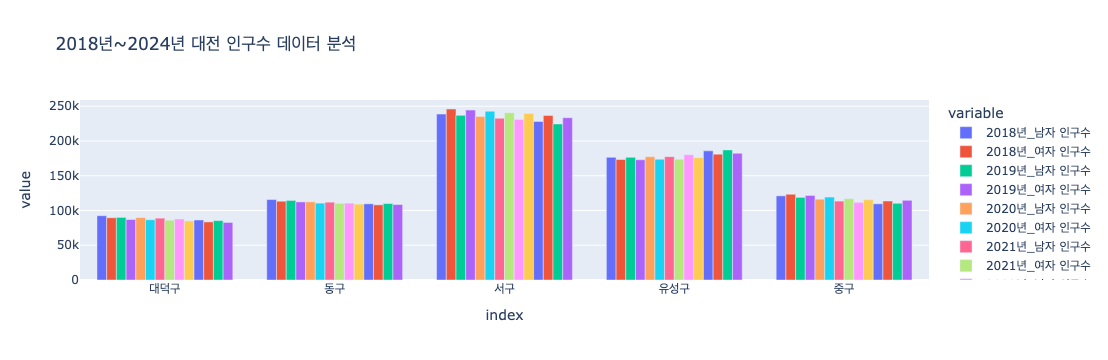

In [45]:
px.bar(
    성별_인구수_df,
    barmode="group",
    title="2018년~2024년 대전 인구수 데이터 분석",
)

# 분석 결론

1. 무슨 **구**가 인구가 가장 많이 줄었고, 증가했을까요?
2. 무슨 **연도**에 인구가 가장 많이 줄었고, 증가했을까요?